In [2]:
import pandas as pd
import numpy as np

# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [23]:
import csv
import sqlite3

conn = sqlite3.connect("../db.sqlite3")

cursor = conn.cursor()

cursor.execute("SELECT * FROM restaurant_orderitem "
               "INNER JOIN restaurant_order "
               "ON restaurant_orderitem.order_id = restaurant_order.id "
               "INNER JOIN restaurant_product "
               "ON restaurant_orderitem.product_id = restaurant_product.id")

rows = cursor.fetchall()

csv_file_name = "output.csv"

with open(csv_file_name, "w") as csv_file:
    csv_writer = csv.writer(csv_file)
    csv_writer.writerows(rows)

conn.close()

In [114]:
df = pd.read_csv("output.csv")

date = pd.to_datetime(df["datetime"])

df.drop(columns=["id", "id.1", "id.2", "order_id", "product_id", "datetime"], inplace=True)

df = pd.concat([df, date], axis=1)
df

,quantity,price,name,datetime
0,2,0.80,Plain Papadum,2019-08-03 20:25:00
1,1,12.95,King Prawn Balti,2019-08-03 20:25:00
2,1,2.95,Garlic Naan,2019-08-03 20:25:00
3,1,3.95,Mushroom Rice,2019-08-03 20:25:00
4,1,8.95,Paneer Tikka Masala,2019-08-03 20:25:00
...,...,...,...,...
74813,2,17.95,House Red wine 75cl,2016-05-18 18:53:00
74814,2,17.95,House Red wine 75cl,2016-05-14 19:28:00
74815,2,17.95,House Red wine 75cl,2016-05-10 13:18:00
74816,1,17.95,House white wine 75cl,2016-04-07 19:04:00


# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

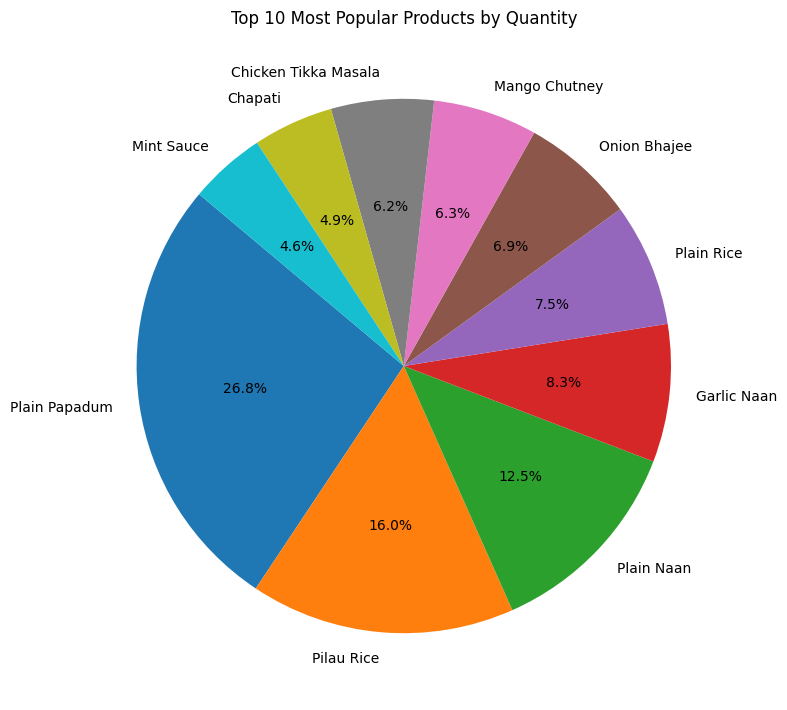

In [115]:
# write your code here
import matplotlib.pyplot as plt

top10 = df.groupby("name")["quantity"].sum().sort_values(ascending=False)[:10]

plt.figure(figsize=(8, 8))
plt.pie(top10, labels=top10.index, autopct='%1.1f%%', startangle=140)
plt.title("Top 10 Most Popular Products by Quantity")
plt.tight_layout()
plt.show()

# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

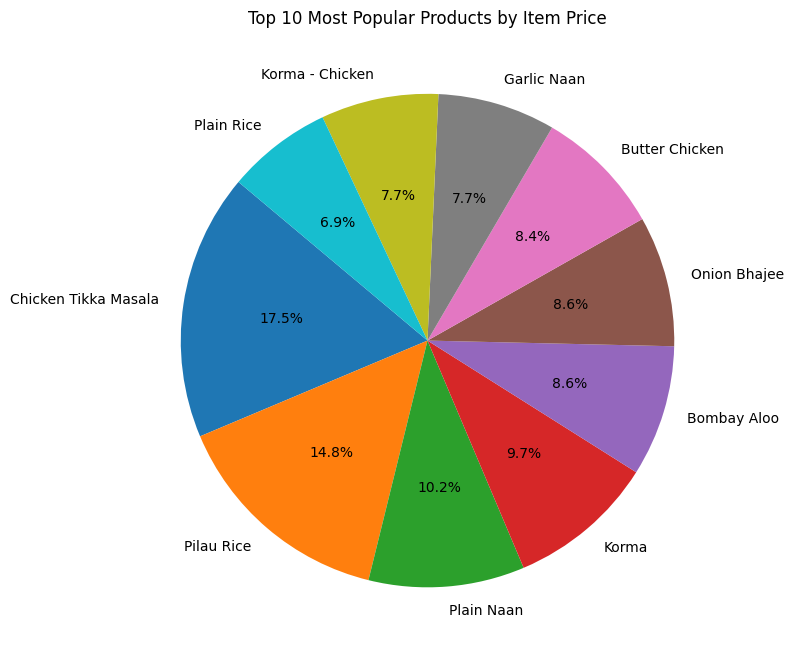

In [118]:
# write your code here
df["ItemPrice"] = df["quantity"] * df["price"]
top10item_price = df.groupby("name")["ItemPrice"].sum().sort_values(ascending=False)[:10]

plt.figure(figsize=(8, 8))
plt.pie(top10item_price, labels=top10item_price.index, autopct='%1.1f%%', startangle=140)
plt.title("Top 10 Most Popular Products by Item Price")
plt.tight_layout()
plt.show()

# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

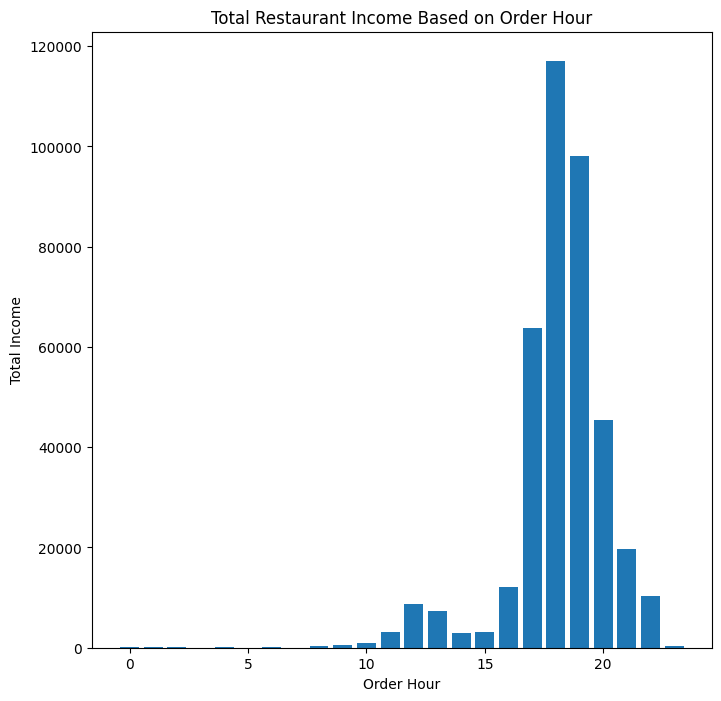

In [130]:
# write your code here
df["OrderHour"] = df["datetime"].dt.hour

hourly_income = df.groupby("OrderHour")["price"].sum()

plt.figure(figsize=(8, 8))
plt.bar(hourly_income.index, hourly_income)
plt.xlabel("Order Hour")
plt.ylabel("Total Income")
plt.title("Total Restaurant Income Based on Order Hour")
plt.show()

# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

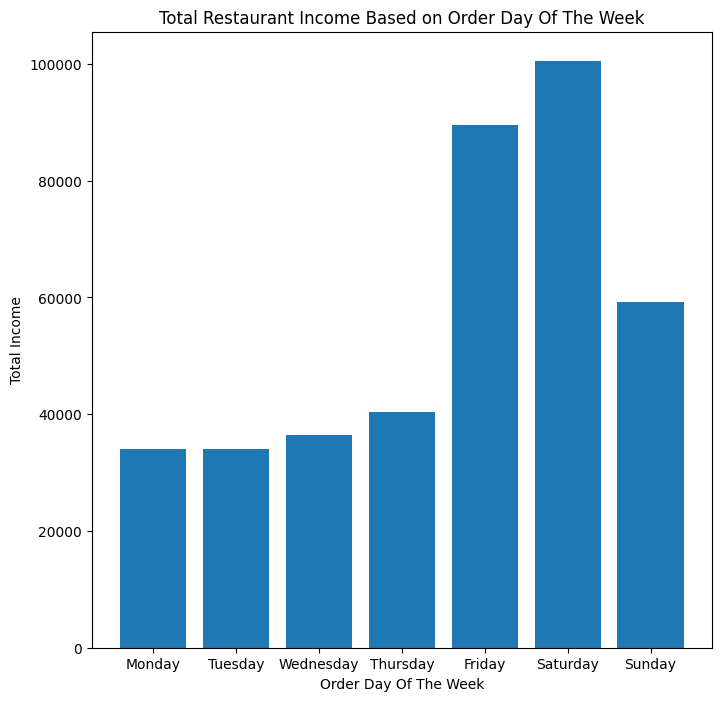

In [133]:
# write your code here
df["OrderDayOfTheWeek"] = df["datetime"].dt.day_name()

daily_income = df.groupby("OrderDayOfTheWeek")["price"].sum()

days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

daily_income = daily_income.reindex(days_order)

plt.figure(figsize=(8, 8))
plt.bar(daily_income.index, daily_income)
plt.xlabel("Order Day Of The Week")
plt.ylabel("Total Income")
plt.title("Total Restaurant Income Based on Order Day Of The Week")
plt.show()